# An Insight into COVID-19 widespread and vaccination progress.

## Data Science Project

#### Contributors

- <b>Anh Duc Dao</b>
- <b>Anh Dung Tu</b>
- <b>Minh Chau Nguyen</b>
- <b>Quoc Huy Tran</b>

### Introduction

COVID-19 was officially announced by the World Health Organization (WHO) as a global pandemic in the begining of the year 2020. The research and production of vaccination partially alleviate the seriousness and widespread of the pandemic. The project is interested in how COVID19 progresses, how vaccination helps human to reduce the number of confirmed cases and deaths, and also how demographic features and characteristics affect the death rate of COVID-19 in differents countries.

### Goals
* Find out the trends of the COVID-19 widespread in different countries in the world 
* Can we figure out how effectively vaccination helps to reduce the COVID-19 related deaths?
* Can we predict the death rate of COVID-19 cases based on the demographic and economic features?

### Data collection

[Coronavirs Source Data](https://ourworldindata.org/coronavirus-source-data): complete COVID-19 dataset is a collection of the COVID-19 data maintained by Our World in Data. It is updated daily and includes data on confirmed cases, deaths, and testing. This dataset also include the data of population, economic and demographic features for all the countries in the world. 
- Data format: CSV file
- Data cleaning: remove null values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

## Loading data and cleaning the Coronavirus source data

In [2]:
covid_df = pd.read_csv("files/owid-covid-data.csv")
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


We will create a new Dataframe from the originals by removing the unnecessary ones.

In [4]:
columns = ['location','continent','date','total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'reproduction_rate', 
           'new_tests', 'positive_rate','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 
           'population', 'population_density', 'median_age', 'aged_65_older', 'gdp_per_capita', 'life_expectancy']
covid_df = pd.DataFrame(covid_df, columns=columns)
covid_df.head()

,location,continent,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density,median_age,aged_65_older,gdp_per_capita,life_expectancy
0,Afghanistan,Asia,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83
1,Afghanistan,Asia,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83
2,Afghanistan,Asia,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83
3,Afghanistan,Asia,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83
4,Afghanistan,Asia,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83


Then, we start to replace and drop the rows that contain NA values

In [5]:
covid_df.isna().sum()

location                        0
continent                    8370
date                            0
total_cases                  7059
new_cases                    7061
total_deaths                18112
new_deaths                  17916
reproduction_rate           27497
new_tests                   76305
positive_rate               68841
total_vaccinations          98376
people_vaccinated           99867
people_fully_vaccinated    102886
new_vaccinations           103764
population                    925
population_density          12368
median_age                  17893
aged_65_older               19143
gdp_per_capita              17166
life_expectancy              9202
dtype: int64

In [6]:
covid_df = covid_df.dropna(subset=['population'])
covid_df = covid_df.dropna(subset=['continent'])
covid_df.update(covid_df[['total_cases','new_cases', 'total_deaths', 'new_deaths', 'reproduction_rate', 'new_tests', 
                          'positive_rate', 'new_vaccinations']].fillna(0))
covid_df.head()

,location,continent,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density,median_age,aged_65_older,gdp_per_capita,life_expectancy
0,Afghanistan,Asia,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83
1,Afghanistan,Asia,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83
2,Afghanistan,Asia,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83
3,Afghanistan,Asia,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83
4,Afghanistan,Asia,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83


In [8]:
## Add a new column 'month_year' base on the 'date' column
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['month_year']=covid_df['date'].dt.to_period('M')
covid_df.head()

,location,continent,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,positive_rate,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density,median_age,aged_65_older,gdp_per_capita,life_expectancy,month_year
0,Afghanistan,Asia,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83,2020-02
1,Afghanistan,Asia,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83,2020-02
2,Afghanistan,Asia,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83,2020-02
3,Afghanistan,Asia,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83,2020-02
4,Afghanistan,Asia,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,39835428.0,54.422,18.6,2.581,1803.987,64.83,2020-02


## Total cases and total deaths over the whole world
We will create a new dataframe that shows the total number of COVID-19 cases and deaths

In [9]:
## Create the dataframe by grouping the total cases by locations
top_country1 = covid_df.groupby(['location'])['total_cases'].max()
top_country1 = pd.DataFrame(top_country1)

## Create the dataframe by grouping the total deaths by locations
top_country2 = covid_df.groupby(['location'])['total_deaths'].max()
top_country2 = pd.DataFrame(top_country2)

## Join two DataFrames
top_country = top_country1.join(top_country2, on='location')

## Create a new column that represents the ratio between the total_deaths and total_cases
top_country['death_ratio'] = top_country['total_deaths']/top_country['total_cases']
top_country

,total_cases,total_deaths,death_ratio
location,,,
Afghanistan,156323.0,7284.0,0.046596
Albania,186793.0,2940.0,0.015739
Algeria,206754.0,5931.0,0.028686
Andorra,15572.0,130.0,0.008348
Angola,64533.0,1716.0,0.026591
...,...,...,...
Vietnam,939463.0,22283.0,0.023719
Wallis and Futuna,0.0,0.0,NaN
Yemen,9810.0,1897.0,0.193374


We will check if there are any columns will NA values and then fill it with 0

In [10]:
top_country.isna().sum()

total_cases      0
total_deaths     0
death_ratio     29
dtype: int64

In [11]:
top_country['death_ratio'] = top_country['death_ratio'].fillna(0)

In [12]:
top_country.describe()

,total_cases,total_deaths,death_ratio
count,2.230000e+02,223.000000,223.000000
mean,1.112520e+06,22519.735426,0.018036
std,4.291582e+06,79190.500817,0.021530
min,0.000000e+00,0.000000,0.000000
25%,8.391500e+03,121.500000,0.006579
50%,1.043480e+05,1716.000000,0.013663
75%,5.398985e+05,10162.000000,0.024393
max,4.625251e+07,750423.000000,0.193374


In [13]:
print('The overall ratio that the COVID-19 patients will survive:', 1-top_country['total_deaths'].mean()/top_country['total_cases'].mean())

The overall ratio that the COVID-19 patients will survive: 0.979757898402462


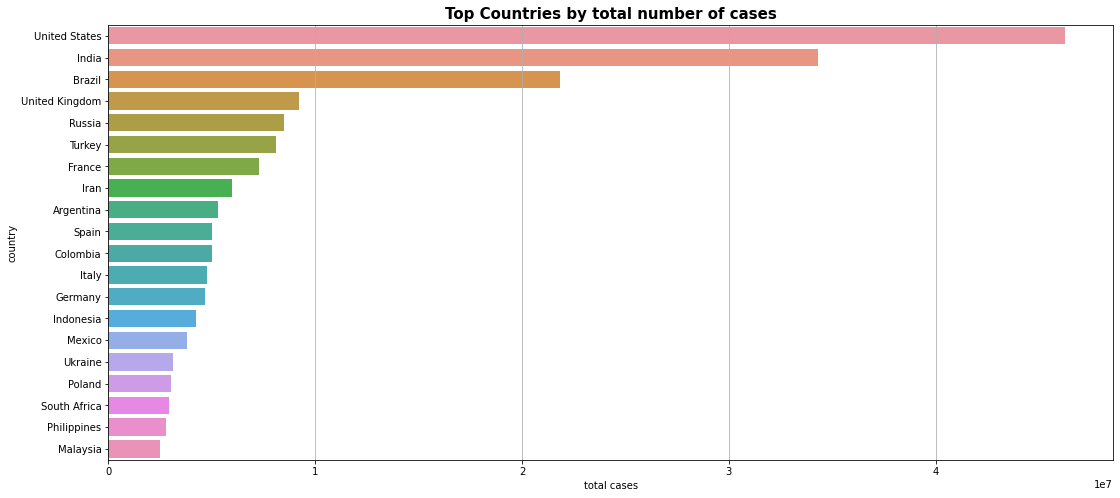

In [14]:
## Show top 20 countries that has the highest total cases
top_country_cases = top_country['total_cases'].sort_values(ascending=False).reset_index()[:20]
top_country_cases.reset_index()

## Plotting the result 
plt.figure(figsize = (18,8))
sns.barplot(data = top_country_cases, x = 'total_cases', y = 'location')
plt.title('Top Countries by total number of cases', weight='bold', size=15)
plt.ylabel('country')
plt.xlabel('total cases')
plt.grid(axis='x')
plt.show()

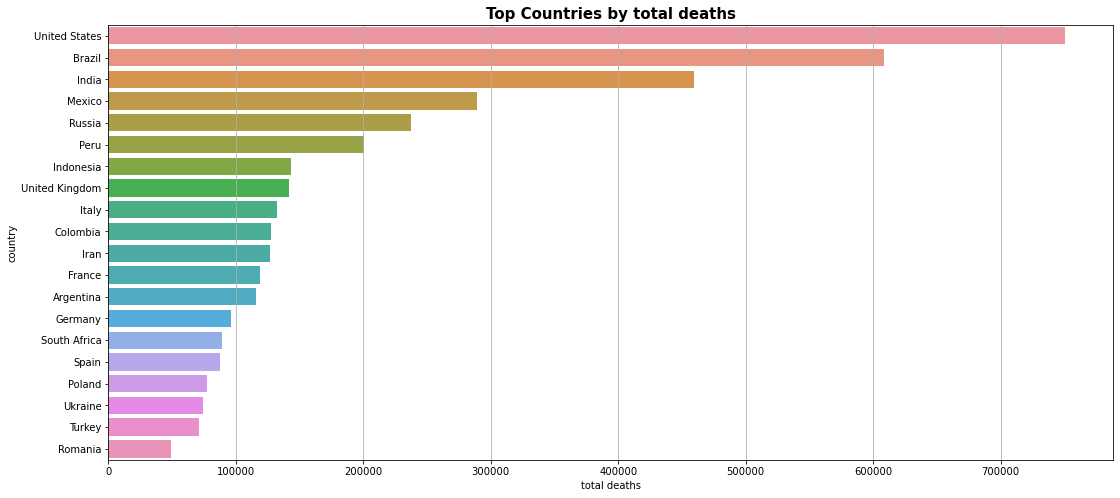

In [15]:
## Show top 20 countries that has the highest total deaths
top_country_deaths = top_country['total_deaths'].sort_values(ascending=False).reset_index()[:20]
top_country_deaths.reset_index()

## Plotting the result 
plt.figure(figsize = (18,8))
sns.barplot(data = top_country_deaths, x = 'total_deaths', y = 'location')
plt.title('Top Countries by total deaths', weight='bold', size=15)
plt.ylabel('country')
plt.xlabel('total deaths')
plt.grid(axis='x')
plt.show()

### Result
From above, we can say The United States has the highest in both of the total number of COVID-19 cases and the number of death from COVID-19.

We can see that the average <b>total_cases</b> over the world is 1112520, the average <b>total_deaths</b> over the world is 22520, and the average ratio over the world that a person who has the COVID-19 will survive is 98%. We can conclude that the overall survival rate for a person who is affected by the pandemic is quite high.

## Informations about the vaccine
Now, we will create a new dataframe to show the informations about the vaccinations

In [64]:
vac = ['location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
vaccine_df = pd.DataFrame(covid_df, columns = vac)

## DropNA
vaccine_df.dropna()

## Group by Date
vaccine_df = vaccine_df.groupby(['date']).sum()
vaccine_df.reset_index(level=0, inplace=True)

## Add month year columns to the data frame
vaccine_df['date'] = pd.to_datetime(vaccine_df['date'])
vaccine_df['month_year'] = vaccine_df.date.dt.to_period('M')
vaccine_df = vaccine_df.drop(columns = 'date')
vaccine_df

,total_vaccinations,people_vaccinated,people_fully_vaccinated,month_year
0,0.000000e+00,0.000000e+00,0.000000e+00,2020-01
1,0.000000e+00,0.000000e+00,0.000000e+00,2020-01
2,0.000000e+00,0.000000e+00,0.000000e+00,2020-01
3,0.000000e+00,0.000000e+00,0.000000e+00,2020-01
4,0.000000e+00,0.000000e+00,0.000000e+00,2020-01
...,...,...,...,...
668,5.804101e+09,2.063602e+09,1.422369e+09,2021-10
669,6.402604e+09,2.202093e+09,1.702767e+09,2021-10
670,6.112321e+09,2.185322e+09,1.549696e+09,2021-11
671,5.925421e+09,2.093185e+09,1.455771e+09,2021-11


In [65]:
## Group the data by month_year
vaccine_month_year = vaccine_df.groupby('month_year').max()
vaccine_month_year.reset_index()

,month_year,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-01,0.000000e+00,0.000000e+00,0.000000e+00
1,2020-02,0.000000e+00,0.000000e+00,0.000000e+00
2,2020-03,0.000000e+00,0.000000e+00,0.000000e+00
3,2020-04,0.000000e+00,0.000000e+00,0.000000e+00
4,2020-05,0.000000e+00,0.000000e+00,0.000000e+00
5,2020-06,0.000000e+00,0.000000e+00,0.000000e+00
6,2020-07,0.000000e+00,0.000000e+00,0.000000e+00
7,2020-08,0.000000e+00,0.000000e+00,0.000000e+00
8,2020-09,0.000000e+00,0.000000e+00,0.000000e+00
9,2020-10,0.000000e+00,0.000000e+00,0.000000e+00


Text(0.5, 0, 'Timestamp')

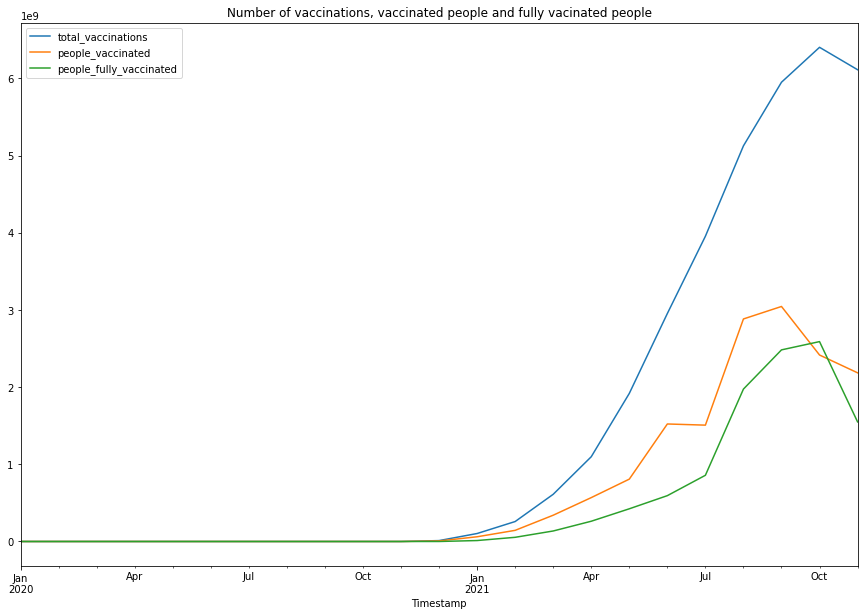

In [74]:
vaccine_month_year.plot(figsize=(15,10))
plt.title("Number of vaccinations, vaccinated people and fully vacinated people")
plt.xlabel("Timestamp")

In [67]:
cas = ['location', 'date', 'total_cases']
cases_df = pd.DataFrame(covid_df, columns = cas)

## DropNA
cases_df.dropna()

## Group by Date
cases_df = cases_df.groupby(['date']).sum()
cases_df.reset_index(level=0, inplace=True)

## Add month year columns to the data frame
cases_df['date'] = pd.to_datetime(cases_df['date'])
cases_df['month_year'] = cases_df.date.dt.to_period('M')
cases_df = cases_df.drop(columns = 'date')
cases_df

,total_cases,month_year
0,0.0,2020-01
1,0.0,2020-01
2,0.0,2020-01
3,0.0,2020-01
4,0.0,2020-01
...,...,...
668,246406233.0,2021-10
669,246712673.0,2021-10
670,247144326.0,2021-11
671,247574532.0,2021-11


In [68]:
## Group the data by month_year
cases_month_year = cases_df.groupby('month_year').max()
cases_month_year.reset_index()

,month_year,total_cases
0,2020-01,9927.0
1,2020-02,85317.0
2,2020-03,875384.0
3,2020-04,3281115.0
4,2020-05,6188285.0
5,2020-06,10458098.0
6,2020-07,17603448.0
7,2020-08,25507106.0
8,2020-09,34011602.0
9,2020-10,46145953.0


Text(0.5, 0, 'Timestamp')

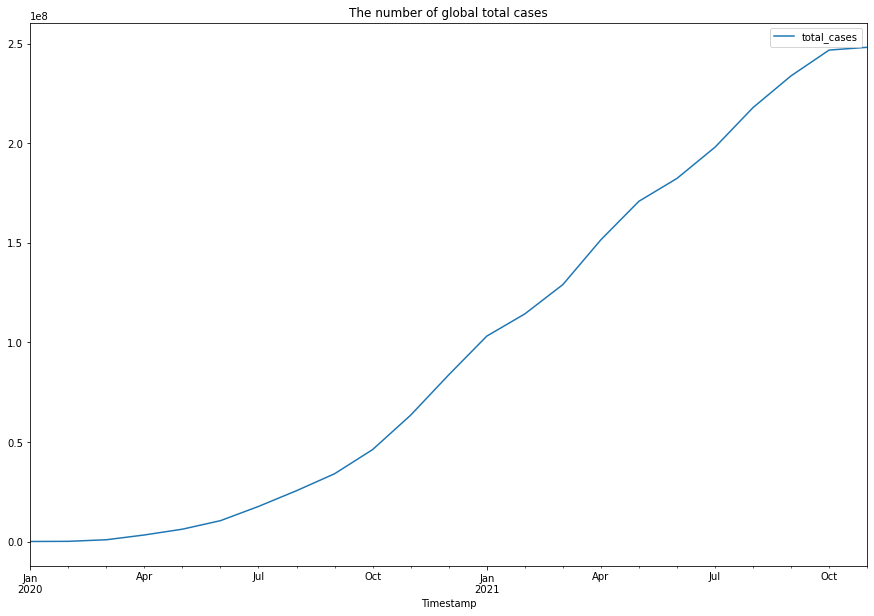

In [73]:
cases_month_year.plot(figsize=(15,10))
plt.title("The number of global total cases")
plt.xlabel("Timestamp")

### Result
From the plot, we can see that the total number of COVID-19 vaccination doses administered <b>(total_vaccinations)</b>, the total number of people who received at least one vaccine dose <b>(people_vaccinated)</b> and the total number of people who received all doses prescribed by the vaccination protocol <b>(people_fully_vaccinated)</b> follow the same trend. All of them both remained at 0 as there was no cures for COVID-19 started to rise at the end of November 2021 which was the time vaccines for the pandemic were published until present. 

We also can see that from Novomber 2021, the trend started to decline. This is because of we do not have enough data for the whole month.

## Relationship among new vaccinations, new cases and new deaths
### Applying Linear Regression
We also want to create a DataFrame to find out if the occurance of new vaccinations and the number of new cases affected the number of new deaths

In [21]:
## Create DataFrame
new = ['date', 'new_vaccinations', 'new_cases', 'new_deaths']
new_df = pd.DataFrame(covid_df, columns=new)

## Group by date
new_df = new_df.groupby(['date']).sum()

new_df.reset_index(level=0, inplace=True)
new_df

,date,new_vaccinations,new_cases,new_deaths
0,2020-01-01,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0
...,...,...,...,...
668,2021-10-30,29462240.0,382109.0,5932.0
669,2021-10-31,14624902.0,306440.0,4407.0
670,2021-11-01,19199522.0,431653.0,6259.0
671,2021-11-02,17901609.0,430206.0,7491.0


Text(0.5, 0, 'Number of daily new deaths')

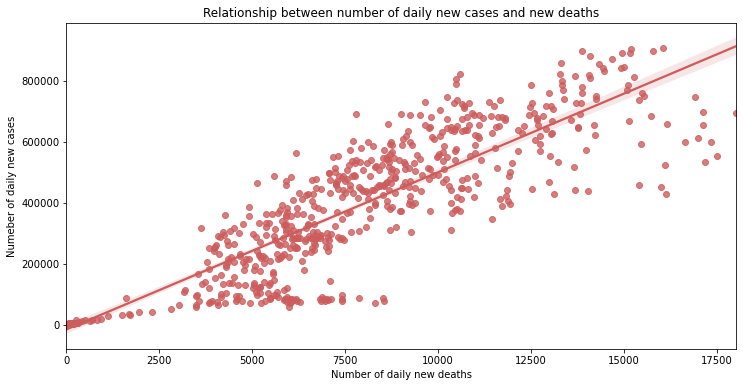

In [22]:
plt.figure(figsize =(12,6))
sns.regplot(y= 'new_cases', x='new_deaths', data=new_df, color = 'Indianred')

plt.title("Relationship between number of daily new cases and new deaths")
plt.ylabel('Numeber of daily new cases')
plt.xlabel('Number of daily new deaths')

Text(0.5, 0, 'Number of daily new deaths')

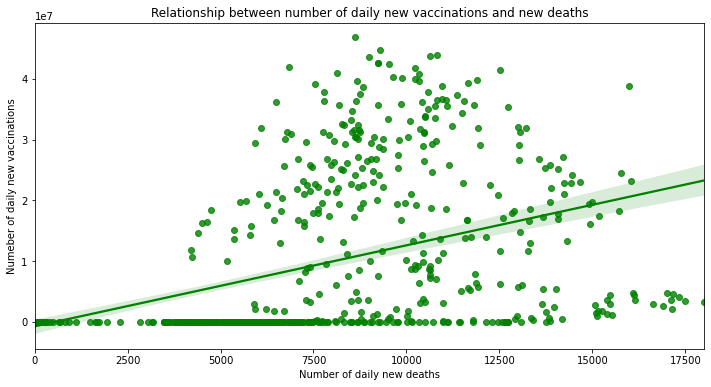

In [23]:
plt.figure(figsize =(12,6))
sns.regplot(y= 'new_vaccinations', x='new_deaths', data=new_df, color ='green')
plt.title("Relationship between number of daily new vaccinations and new deaths")
plt.ylabel('Numeber of daily new vaccinations')
plt.xlabel('Number of daily new deaths')

We will split the data into two sets - training and testing data, and build a model on the training data and test it on the test data.

In [24]:
train, test = train_test_split(new_df, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(538, 4)
(135, 4)


In [25]:
X_train = train[['new_vaccinations', 'new_cases']]
y_train = train[['new_deaths']]
X_test = test[['new_vaccinations', 'new_cases']]
y_test = test[['new_deaths']]
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [[-9.50961295e-06  1.50209708e-02]] + [1981.02100052]


In [26]:
predicted_1 = reg.predict(X_train)
r2_1 = r2_score(y_train, predicted_1)
print("R Squared for train set:", r2_1)

R Squared for train set: 0.7679579616133608


In [27]:
predicted_2 = reg.predict(X_test)
r2_2 = r2_score(y_test, predicted_2)
print("R Squared for test set:", r2_2)

R Squared for test set: 0.7615704868411253


Now, we will plot the Train and Test Set

Text(0.5, 1.0, 'Train and Test Set')

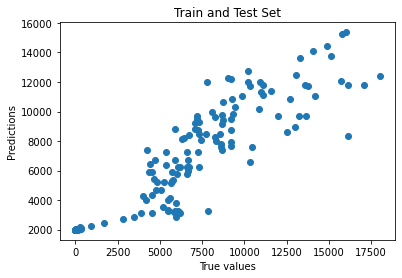

In [28]:
plt.scatter(y_test, predicted_2)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('Train and Test Set')

### Result
We can see that the $R^2$ on train dataset (0.768) is closer to 1 than the $R^2$ on test dataset (0.762). This means the training dataset is just slightly better than test dataset. As the $R^2$ values for train and test set are close to each other, thus there is no indication of overfitting model.

## The ratio of COVID-19 will reoccur, how GDP and the Life Expectancy will affect the death rate of COVID-19
### Applying Logistic Regression
Now we will create a dataframe to show the informations about the ratio of COVID-19 will reoccur, how GDP and the Life Expectancy will be affected

In [39]:
covid_df1 = pd.pivot_table(data = covid_df, index = 'location', values = ['reproduction_rate','population','population_density','median_age','aged_65_older','gdp_per_capita','life_expectancy'], aggfunc ='max').reset_index()
covid_df1.head()

,location,aged_65_older,gdp_per_capita,life_expectancy,median_age,population,population_density,reproduction_rate
0,Afghanistan,2.581,1803.987,64.83,18.6,39835428.0,54.422,1.62
1,Albania,13.188,11803.431,78.57,38.0,2872934.0,104.871,2.11
2,Algeria,6.211,13913.839,76.88,29.1,44616626.0,17.348,2.05
3,Andorra,NaN,NaN,83.73,NaN,77354.0,163.755,1.62
4,Angola,2.405,5819.495,61.15,16.8,33933611.0,23.890,1.35


Now, we will create a new column for the DataFrame top_country that show the label of death rate as 1 if the death_ratio of that country is <b>higher than or equal to</b> the average death_ratio over the whole world, and 0 if the death_ratio of that country is <b>lower than</b> the average death_ratio over the whole world.

In [40]:
world_dr = top_country['total_deaths'].mean()/top_country['total_cases'].mean()
top_country.loc[top_country['death_ratio'] >= world_dr, 'deathratelabel'] = 1
top_country.loc[top_country['death_ratio'] < world_dr, 'deathratelabel'] = 0
top_country.head()

,total_cases,total_deaths,death_ratio,deathratelabel
location,,,,
Afghanistan,156323.0,7284.0,0.046596,1.0
Albania,186793.0,2940.0,0.015739,0.0
Algeria,206754.0,5931.0,0.028686,1.0
Andorra,15572.0,130.0,0.008348,0.0
Angola,64533.0,1716.0,0.026591,1.0


Then, we join the column <i>deathratelabel</i> of <b>top_country</b> to the dataframe <b>covid_df1</b>

In [41]:
## Joining data
covid_df1 = covid_df1.join(top_country['deathratelabel'], on= 'location')

## Drop all the rows that contain NA values
covid_df1 = covid_df1.dropna()

## Remove outliers
q_low = covid_df1['population_density'].quantile(0.05)
q_hi  = covid_df1['population_density'].quantile(0.95)
covid_df1 = covid_df1[(covid_df1['population_density']< q_hi) & (covid_df1['population_density'] > q_low)]

covid_df1.head()

,location,aged_65_older,gdp_per_capita,life_expectancy,median_age,population,population_density,reproduction_rate,deathratelabel
0,Afghanistan,2.581,1803.987,64.83,18.6,39835428.0,54.422,1.62,1.0
1,Albania,13.188,11803.431,78.57,38.0,2872934.0,104.871,2.11,0.0
2,Algeria,6.211,13913.839,76.88,29.1,44616626.0,17.348,2.05,1.0
4,Angola,2.405,5819.495,61.15,16.8,33933611.0,23.890,1.35,1.0
6,Antigua and Barbuda,6.933,21490.943,77.02,32.1,98728.0,231.845,1.51,1.0


Now we start to apply the Logistic Regression

In [42]:
# Split your data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(covid_df1, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(129, 9)
(33, 9)


In [43]:
# Getting input data and targets for building prediction model
X_train = train.drop(['deathratelabel', 'location'], axis=1)
y_train = train['deathratelabel']
X_test = test.drop(['deathratelabel', 'location'], axis=1)
y_test = test['deathratelabel']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape:  (129, 7)
y_train shape:  (129,)
X_test shape:  (33, 7)
y_test shape:  (33,)
     aged_65_older  gdp_per_capita  life_expectancy  median_age  population  \
119          2.929        1416.440            67.04        19.6  28427333.0   
211         18.517       39753.244            81.32        40.8  68207114.0   
156          6.378        8827.010            74.25        26.5   7219641.0   
58           7.104       10581.936            77.01        28.1  17888474.0   
217          6.614       16745.022            72.06        29.0  28704947.0   

     population_density  reproduction_rate  
119              43.951               1.76  
211             272.898               3.41  
156              17.144               2.29  
58               66.939               2.15  
217              36.253               1.73  
119    1.0
211    0.0
156    1.0
58     1.0
217    0.0
Name: deathratelabel, dtype: float64


In [44]:
# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Doing predictions on train and test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

### Evaluation

In [46]:
# Evaluate the performance of your trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Accuracy score on training set:  0.5968992248062015
Accuracy score on testing set:  0.5151515151515151


In [37]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set: 
[[17  0]
 [16  0]]


In [38]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Confusion matrix on train set: 
[[76  3]
 [49  1]]


### Result
For <b>test set</b>:
- The Accuracy Score on test set is 0.515.

- From the confusion matrix for test set above: True Positive = 17; False Positive = 16; False Negative = 0; True Negative = 0.

- We find that for test set, there are 17 cases which the actual value and also the predicted values are the same and 16 cases which the model has given the wrong prediction.

For <b>train set</b>:
- We can see that the Accuracy Score on train set is 0.597.

- From the confusion matrix for train set above: True Positive = 76; False Positive = 49; False Negative = 3; True Negative = 1.

- We find that for train set, there are 77 cases which the actual value and also the predicted values are the same and 52 cases which the model has given the wrong prediction.

In conclusion, the accuracy score is not acceptably high, so it is not possible to predict the death rate based on the population, demographic and economic features of countries as above. Another reason why the accuracy of the model acquired is not high enough because the data is only adequate for 162 out of 222 countries in the world, the lack of data can significantly affect the accuracy scores. 

However, we still do the features selection by using Recursive Feature Selection technique for the model, which is show as below.

### Feature Selection
We will use RFE technique to find the best model with the features to use as input to the classifier

First we will test with the number of features = 1

In [39]:
# Creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [40]:
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on test set:  0.5151515151515151


In [41]:
# Summarize all features
for i in range(X_train.shape[1]):
    print(X_train.columns[i])
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
    print()

aged_65_older
Column: 0, Selected False, Rank: 2.000

gdp_per_capita
Column: 1, Selected False, Rank: 6.000

life_expectancy
Column: 2, Selected False, Rank: 4.000

median_age
Column: 3, Selected False, Rank: 3.000

population
Column: 4, Selected False, Rank: 7.000

population_density
Column: 5, Selected False, Rank: 5.000

reproduction_rate
Column: 6, Selected True, Rank: 1.000



Now, we will write the function to try every number of features which are possible

In [42]:
# To increment number of features, one at each time
acc_scores = []
for i in range(1,X_train.shape[1]):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print("Acc on test set using", i, "features: ", acc_score)
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.5151515151515151
Acc on test set using 2 features:  0.5151515151515151
Acc on test set using 3 features:  0.5151515151515151
Acc on test set using 4 features:  0.5757575757575758
Acc on test set using 5 features:  0.5757575757575758
Acc on test set using 6 features:  0.5757575757575758


Then, we will plot to find out the trend of the accuracy score on test set using RFE by using different number of features

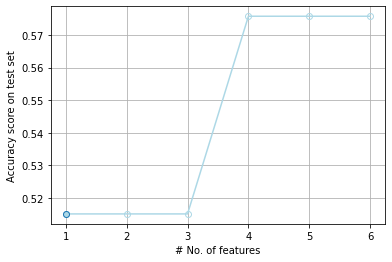

In [43]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, X_train.shape[1]):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, X_train.shape[1]), acc_scores, marker = 'o', color = 'blue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'blue')

### Result
From the ranking results above and the plot, we can see that when the number of features is 1,2 and 3, the accuracy score is always equal to 0.515, while if the number of features is 4,5 and 6, the accuracy score will be approximately above 0.57. As there is no significant improvement in the accuracy score if we take more than 4 features into consideration, the suggested 4 features would be reproduction_rate, aged_65_older, life_expectancy and median_age.

## Conclusion
* From the data exploration,it can be seen that: 
    - America is the country that have the greatest number of cases and deaths due to COVID-19 pandemic.
    - Most countries in the top 20 countries which have the highest number of confirmed cases are developed countries. 
    - Average ratio of a Covid patient who will survive is 98%
    - The vaccination were taken since the begining of 2021. However, the number of cases still continue to rise.

* Relationship among new vaccinations, new cases and new deaths (Linear Regression)
    - There is a positive linear relationship between daily new cases and daily new deaths
    - On the other hand, there is no evidence for relationship between number of vaccination and number of new deaths.
    - The R-squared acquired is approximately 0.77, which is acceptable. Thus, the model is able to explain the variance in the response variable. 

* The ratio of COVID-19 will reoccur, how GDP and the Life Expectancy will be affected (Logistic regression)
    - Based on the acquired result above, since the accuracy score is not acceptably high, the model is not suitable to predict the death rates using given features due to the small number of features (7). It is suggested that to make the model more appropriate, more different features need to be taken into considaration. 